# Ensemble Learning




Ensemble learning is a powerful machine learning paradigm where multiple models (often referred to as "weak learners") are trained to solve the same problem and combined to get better results. The main principle behind ensemble methods is that a group of weak learners can come together to form a strong learner, thereby increasing the accuracy and robustness of the model.



In this project, I will consider three types of ensemble concepts and methods. Namely,

**Hard Voting**

**Bagging**

**Random Forests**

# Hard Voting

In hard voting (used for classification), the predicted output class is a simple majority vote of the predictions from all models. Each model gets one vote, and the class with the majority of votes is the final prediction.

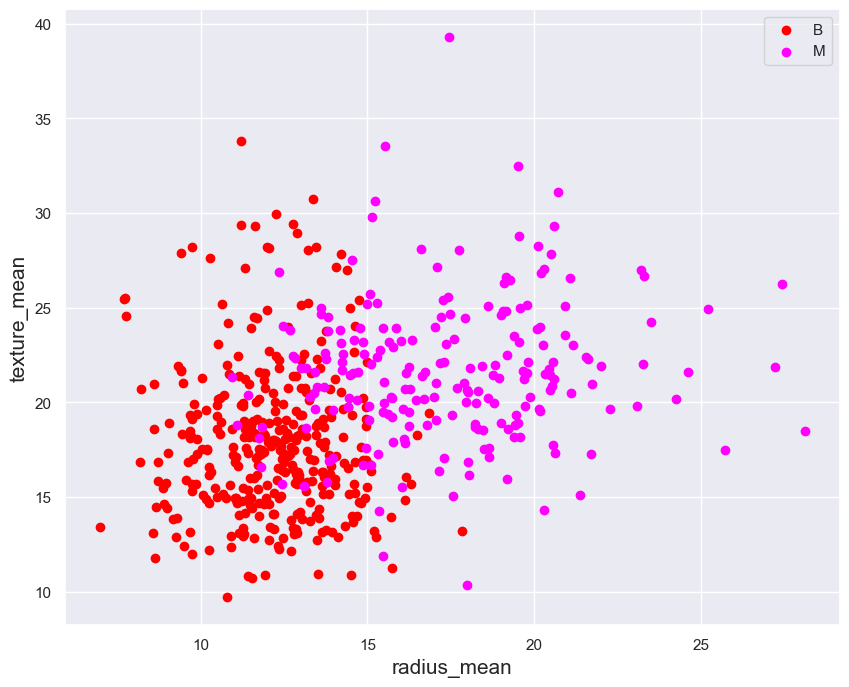

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("Cancer_Detection.csv")


X = df[["radius_mean", "texture_mean"]].to_numpy()


# Define labeling function
def make_labels(y):
    if y == "B":
        return 0
    else:
        return 1
         
# Create target value array
y = df["diagnosis"].map(make_labels).to_numpy()

# Plot the data
Status = ["B", "M"]
colors = ["red", "magenta"]

fig, ax = plt.subplots(figsize=(10, 8))
for species, color in zip(Status, colors):
    temp_df = df[df.diagnosis == species]  # Use species variable here
    ax.scatter(temp_df.radius_mean,
               temp_df.texture_mean,
               c=color,
               label=species)  # Use species for the label
    
ax.set_xlabel("radius_mean", fontsize=15)
ax.set_ylabel("texture_mean", fontsize=15)
ax.legend()

plt.show()

In [5]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
        voting = "hard"
    )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.8771929824561403
logistic regression accuracy: 0.8859649122807017
random forest accuracy: 0.8771929824561403
voting classifier accuracy: 0.881578947368421


# Bagging


**Bootstrap Aggregating (Bagging):** In bagging, multiple models are trained in parallel, but each model sees a slightly different subset of the data. This is achieved by performing bootstrapping, which is random sampling with replacement. Bagging can reduce variance and helps to avoid overfitting.


In [6]:
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       138
           1       0.93      0.79      0.86        90

    accuracy                           0.89       228
   macro avg       0.90      0.88      0.89       228
weighted avg       0.90      0.89      0.89       228
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       138
           1       0.85      0.79      0.82        90

    accuracy                           0.86       228
   macro avg       0.86      0.85      0.85       228
weighted avg       0.86      0.86      0.86       228
 



In [7]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       138
           1       0.93      0.79      0.86        90

    accuracy                           0.89       228
   macro avg       0.90      0.88      0.89       228
weighted avg       0.90      0.89      0.89       228
 



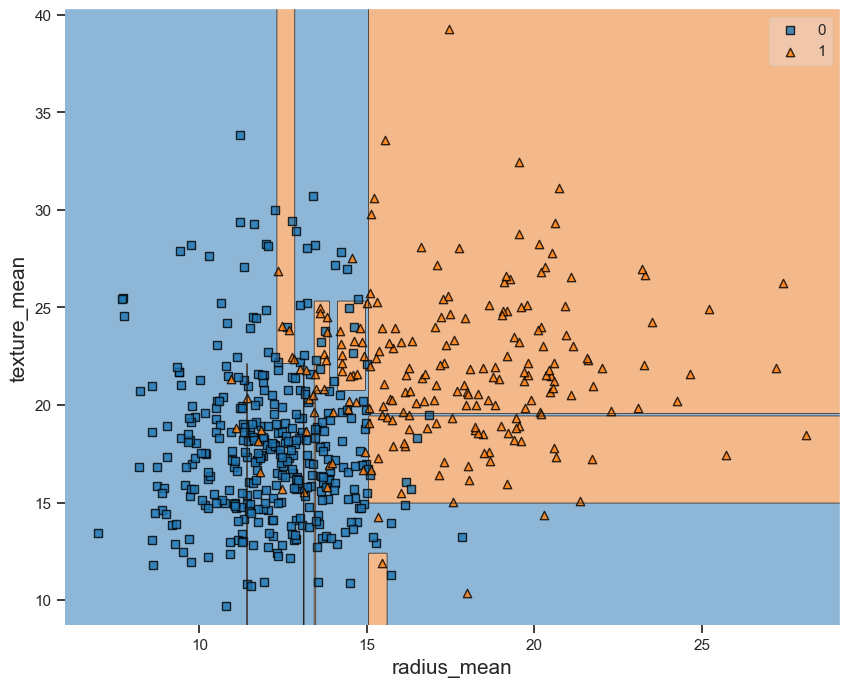

In [8]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

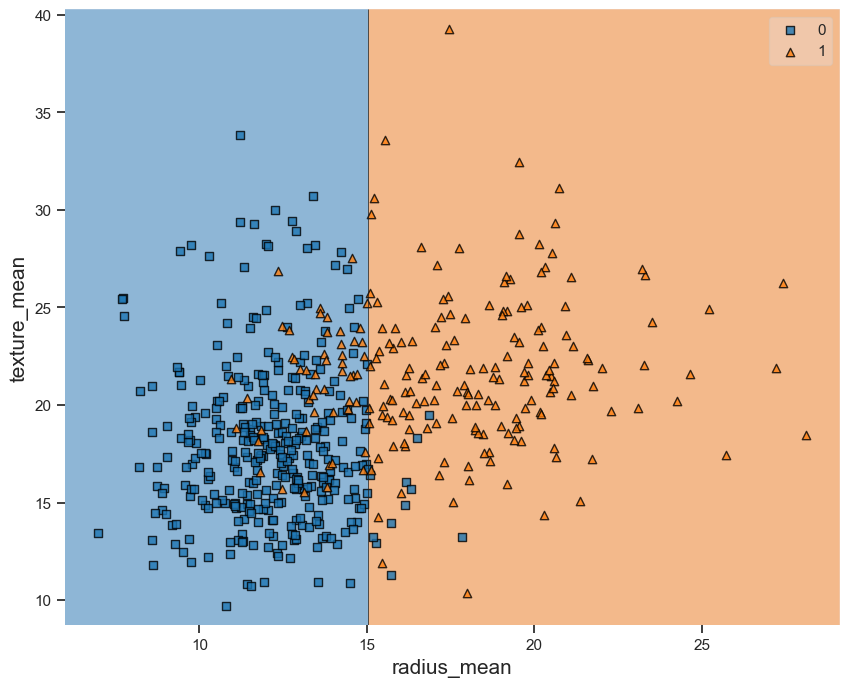

In [9]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

# Random Forests

**Random Forests:** A special case of bagging where decision trees are used as weak learners. In addition to bootstrapping, random forests introduce more randomness by selecting a random subset of features for splitting at each node. This results in an increase in diversity among the trees

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       151
           1       0.79      0.79      0.79        77

    accuracy                           0.86       228
   macro avg       0.84      0.84      0.84       228
weighted avg       0.86      0.86      0.86       228
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       151
           1       0.90      0.82      0.86        77

    accuracy                           0.91       228
   macro avg       0.91      0.89      0.89       228
weighted avg       0.91      0.91      0.91       228
 



In [11]:
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       151
           1       0.90      0.82      0.86        77

    accuracy                           0.91       228
   macro avg       0.91      0.89      0.89       228
weighted avg       0.91      0.91      0.91       228
 



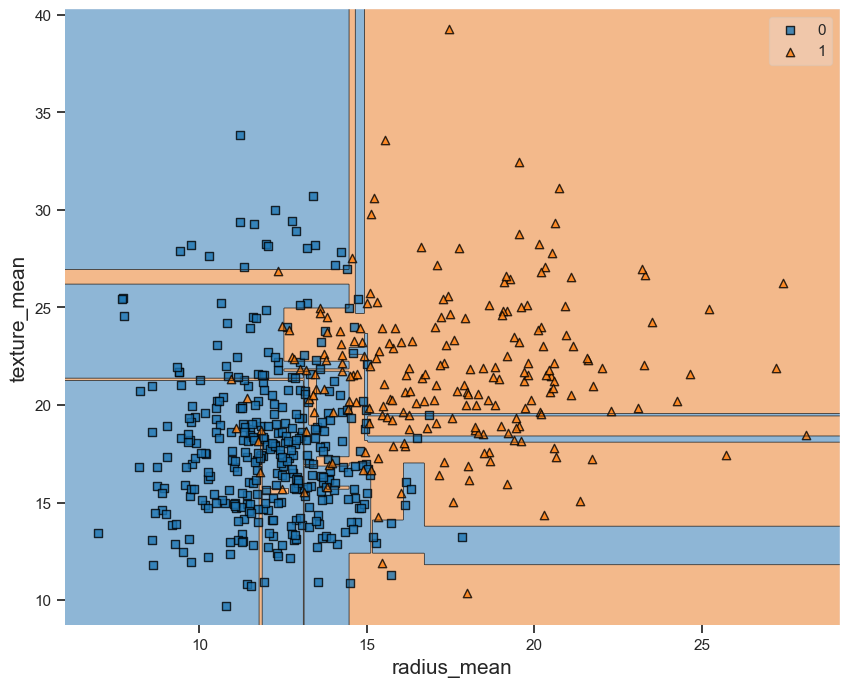

In [13]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

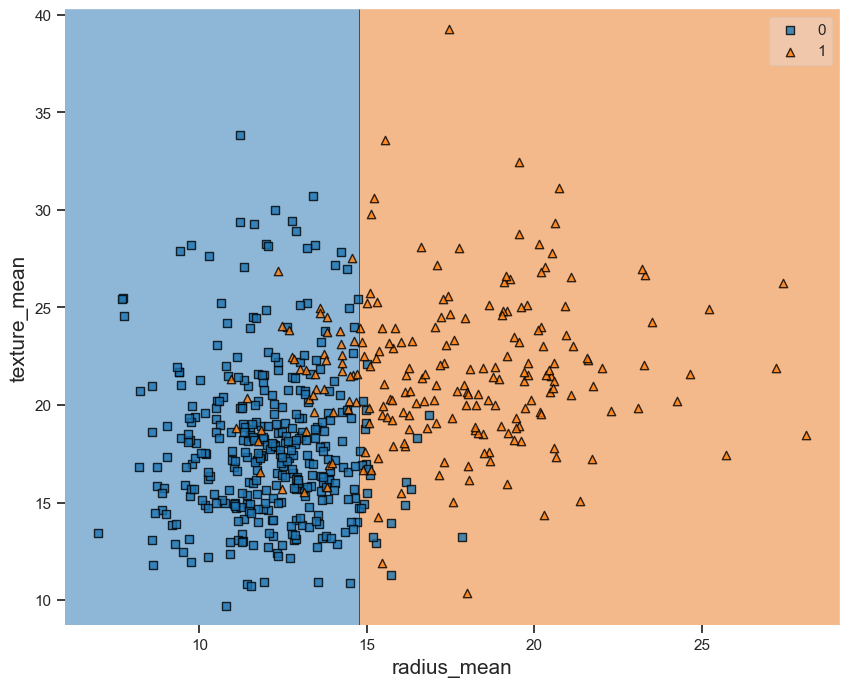

In [14]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

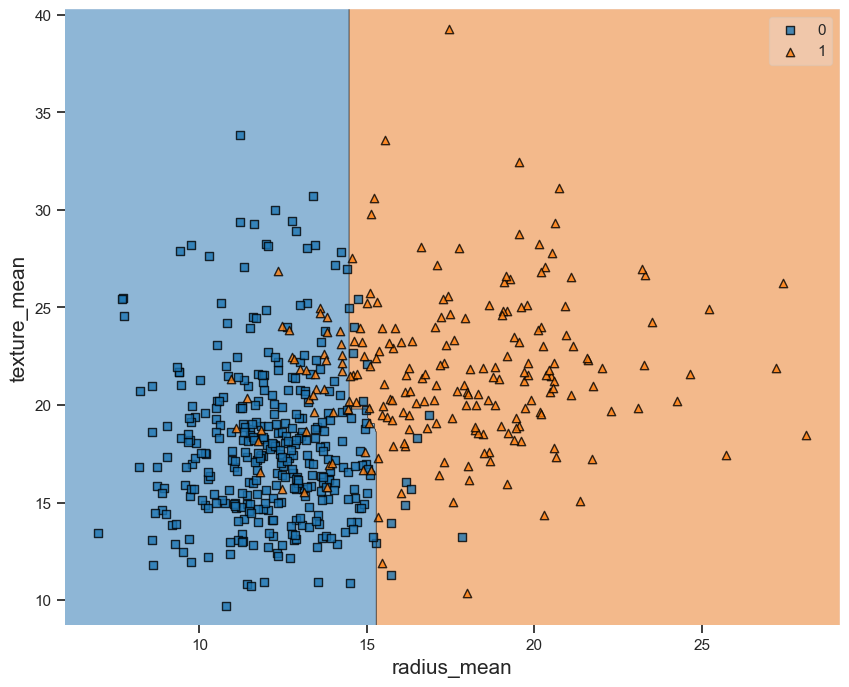

In [15]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

## Add more features
It may be the case that we can improve the performance of all three models by considering more features in the dataset. With this in mind, let's consider these three models on 4 features of the dataset. 

In [17]:
from sklearn.ensemble import RandomForestClassifier

X = df[["radius_mean","texture_mean","perimeter_mean","area_mean"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.79      0.83      0.81        77

    accuracy                           0.87       228
   macro avg       0.85      0.86      0.85       228
weighted avg       0.87      0.87      0.87       228
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       151
           1       0.95      0.82      0.88        77

    accuracy                           0.93       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.93      0.93      0.92       228
 



In [18]:
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       151
           1       0.95      0.82      0.88        77

    accuracy                           0.93       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.93      0.93      0.92       228
 



In [19]:
forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       151
           1       0.95      0.82      0.88        77

    accuracy                           0.93       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.93      0.93      0.92       228
 



# Feature Importance

In [20]:
names = ["radius_mean","texture_mean","perimeter_mean","area_mean"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

radius_mean 0.2106146722598867
texture_mean 0.10645978072945834
perimeter_mean 0.3957627974474046
area_mean 0.28716274956325033


## Advantages of Ensemble Learning

**Improved Accuracy:** By combining multiple models, ensembles often achieve higher accuracy than any single model.

**Robustness:** They are less likely to be affected by noise and are more stable.

**Reduced Risk of Overfitting:** Especially with techniques like bagging and random forests.

## Challenges

**Increased Complexity:** Ensemble models can be more difficult to interpret compared to individual models.

**Computationally Expensive:** Training multiple models can be computationally more intensive.

**Parameter Tuning:** Requires careful tuning of parameters and selection of the right models to ensemble.